[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cindyweng18/csc448hw2/blob/main/Assignment2.ipynb)

# Assignment 2: WebScraping with BeautifulSoup and Pandas DataFrames
### By: Cindy Weng Zhu

For this assignment, I would like to show WebScraping using Python's BeautifulSoup library, show the data with Pandas DataFrames library, and visualizing some results with MatPlotLib library.

![PandaSupermarket](https://i.pinimg.com/originals/6b/23/b5/6b23b5c6f07d8174e0a64dfe6828f438.gif "Panda")

## Table of Content

1. [Introduction](#introduction)
2. [Imports](#imports)
3. [WebScraping](#web)
4. [DataFrame](#pandas)
5. [Visualizations](#visual)
6. [Conclusion](#conclusion)
7. [References](#references)

## Introduction <a class="anchor" id="introduction"></a>

During my first CS internship, I learned about the beauty of webscraping by the wonderful team I was assigned to. I am not sure if revealing things about my internship would get me in trouble (I do not work there anymore) but I will try to not be as specific as possible. 

My team and I used webscraping to obtain data from telecommunications services such as T-Mobile, Verizon, AT&T, etc. from many countries around the globe. This data includes their mobile plans offered through their website to their clients which include the name, prices, how many GB of data plan, how many minutes and messages it includes, etc. This data is collected automatically at the end of every day.

The data was sent to a database where interns like me would check if anything seemed out of order, for example, the price of plan X would say ERROR, perhaps because the website changed its HTML or its price. In any case, interns were in charge to make any changes on the code and submit it so that the database had the correct data for data analysts to use. I never used Jupyter Notebook formally with my team, rather, it would be a way for me to test my code and then copy it onto the actual Python file. 

On the other hand, I got to know a lot about Pandas DataFrames using Jupyter Notebook from my Senior Design Project course which I enjoyed learning.

For this assignment, I will be using [Amazon's Best Seller in Books](https://www.amazon.com/gp/bestsellers/books/283155/ref=s9_acsd_ri_bw_clnk/ref=s9_acsd_ri_bw_c2_x_c2cl?pf_rd_m=ATVPDKIKX0DER&pf_rd_s=merchandised-search-10&pf_rd_r=DRWME6X0YJNSCKRA4A2D&pf_rd_t=101&pf_rd_p=ec1034ac-997c-47fd-8075-3a3a4b4c3aa3&pf_rd_i=283155) website to scrap the data. Let's see what we can find!

## Library Imports<a class="anchor" id="imports"></a>

In order to scrape a website, we would need to use two libraries: `requests` and `BeautifulSoup`. For Pandas, it is, well, the `Pandas` library. And for visualizations, we will use `matplotlib` library. The `numpy` library is mostly used for statistics purposes which we can use in correlation with matplotlib.

In [1]:
import numpy as np
import requests
import matplotlib.pyplot as plt
import pandas as pd
from bs4 import BeautifulSoup

## WebScraping<a class="anchor" id="web"></a>

To start, we need to make a request to the website to obtain its HTML text, we can use request's method `get` and assign to a variable called `url`.

In [2]:
url = requests.get('https://www.amazon.com/gp/bestsellers/books/283155/ref=s9_acsd_ri_bw_clnk/ref=s9_acsd_ri_bw_c2_x_c2cl?pf_rd_m=ATVPDKIKX0DER&pf_rd_s=merchandised-search-10&pf_rd_r=DRWME6X0YJNSCKRA4A2D&pf_rd_t=101&pf_rd_p=ec1034ac-997c-47fd-8075-3a3a4b4c3aa3&pf_rd_i=283155')

Now we can use `BeautifulSoup` to parse the data and manipulate it, we will assign this to a variable called `source`.

In [3]:
source = BeautifulSoup(url.text, 'html.parser')

With `source` being a BeautifulSoup object, we can use its method to extract HTML data from the website. From Amazon's website, we can see that all the books have basically the same format. It shows the book's image, then the title, the author, reviews, type of book, and finally followed by its price. When we right-click and `Inspect` the website, we can see that in the HTML, it does follow the same format for each book and this is exactly what we want for webscraping.

![WebScraping Meme](https://miro.medium.com/max/550/0*Bj_O1jRFzZjKxzi4.jpg)

When we Inspect the website, we can see that each book is built into a list or an `li` in HTML so we can obtain all of the books's information which we described earlier. We can do this using BeautifulSoup's method `find_all` to find all the HTML text which meets the conditions:

In [4]:
all_books = source.find_all("li", {"class", "zg-item-immersion"})

`all_books` contains HTML text that pertains to a specific book. We can use a `for` loop to go through all the first 50 Best Seller Books shown on the website. For now, we will be using lists to store the book's link, title, author's name, type, price, number of stars, and number of reviews.

All of the tags below were used after furthering inspecting which uses which. Then, we can use the `text` method to remove all the HTML tags and just have the text that we want. We use `strip` to clean the text of any white spaces that it may have around it.

In [5]:
# Empty lists to store data
all_urls, all_titles, all_authors, all_types, all_prices, all_stars, all_reviews = [], [], [], [], [], [], []

# Iterate through each "book" in Amazon website
for book in all_books:
    # The link obtained from the HTML does not contain www.amazon.com, for a person to access this link, we need
    # to include this string
    book_url = "https://www.amazon.com" + book.find("a", {"class", "a-link-normal"}).get("href")
    all_urls.append(book_url)
    
    book_title = book.find("a", {"class", "a-link-normal"}).text.strip()
    all_titles.append(book_title)
    
    book_author = book.find("div", {"class", "a-row a-size-small"}).text.strip()
    all_authors.append(book_author)
    
    # This name class is the same as the above, so we use find_all method and select the next one
    book_type = book.find_all("div", {"class","a-row a-size-small"})[1].text.strip()
    all_types.append(book_type)
    
    book_price = book.find_all("div", {"class", "a-row"})[3].text.strip()
    # The data obtained is a text, aka a string. For numeric values, it is best to convert them to number data types
    # Since the string contained the dollar symbol ($), we use split method and choose the second one
    # Then we can convert it to a float type
    book_price = float(book_price.split("$")[1])
    all_prices.append(book_price)
    
    try:
        book_star = float(book.find("span", {"class", "a-icon-alt"}).text.strip().split(" ")[0])
    except Exception:
        book_star = 0
    all_stars.append(book_star)

    try:
        book_review = book.find("a", {"class", "a-size-small a-link-normal"}).text.strip()
    except Exception:
        book_rewview = 0
    all_reviews.append(book_review)

When I first ran the code without the `try-except` blocks, it gave me an error of `NoneType` has no method text which means that the HTML returned before the text method is a null, that is, the tag does not exist for that book. If we look back on the website, some books do not have reviews or stars (Best Seller much?) so we can use the `try-except` blocks so that the code can try to run the code and if a book does not have reviews or stars, then we can assume that it is 0 for now.

That was a lot! You can take a break, you deserve it, go you!

How can we better visualize all this data we just collected? There are a number of ways for this such as a database or a `DataFrame` so let's do the latter. To get started, we can transfer the data into a dictionary as such:

In [6]:
# Create a data structure - dictionary, to organize data collected from webscraping
book_dict = {
    "Title": all_titles,
    "Author": all_authors,
    "Price (in dollars)": all_prices,
    "Type": all_types,
    "URL": all_urls,
    "Stars (out of 5)": all_stars,
    "Number of Reviews": all_reviews
}

## Pandas DataFrame<a class="anchor" id="pandas"></a>

Now that have a somehow cleaner version of the Best Seller Books by Amazon, we can use Panda's DataFrame's method `from_dict` to convert the `book_dict` dictionary into a DataFrame and visualize it better!

In [7]:
# Convert from dictionary to DataFrame
df = pd.DataFrame.from_dict(book_dict)
df

,Title,Author,Price (in dollars),Type,URL,Stars (out of 5),Number of Reviews
0,Peril,Bob Woodward,19.82,Hardcover,https://www.amazon.com/Peril-Bob-Woodward/dp/1...,4.4,"1,048"
1,The High 5 Habit: Take Control of Your Life wi...,Mel Robbins,20.99,Hardcover,https://www.amazon.com/High-Habit-Take-Control...,4.0,2
2,The Wish,Nicholas Sparks,15.99,Hardcover,https://www.amazon.com/Wish-Nicholas-Sparks/dp...,0.0,2
3,Vanderbilt: The Rise and Fall of an American D...,Anderson Cooper,18.22,Hardcover,https://www.amazon.com/Vanderbilt-Rise-Fall-Am...,4.5,206
4,It Ends with Us: A Novel,Colleen Hoover,9.47,Paperback,https://www.amazon.com/Ends-Us-Novel-Colleen-H...,4.7,"32,078"
5,Atomic Habits: An Easy & Proven Way to Build G...,James Clear,11.98,Hardcover,https://www.amazon.com/Atomic-Habits-Proven-Bu...,4.8,"53,005"
6,Bewilderment: A Novel,Richard Powers,17.88,Hardcover,https://www.amazon.com/Bewilderment-Novel-Rich...,4.4,80
7,Little Blue Truck's Halloween,Alice Schertle,7.86,Board book,https://www.amazon.com/Little-Trucks-Halloween...,4.9,"7,184"
8,American Marxism,Mark R. Levin,16.74,Hardcover,https://www.amazon.com/American-Marxism-Mark-R...,4.9,"15,105"
9,Apples Never Fall,Liane Moriarty,17.39,Hardcover,https://www.amazon.com/Apples-Never-Fall-Liane...,4.4,"2,490"


That's neat!

Note: If there is an empty DataFrame, it might be because the website wasn't properly loaded at the beginning. Please rerun the notebook from the `request.get` cell.

https://img.ifunny.co/images/98df81bc4648c2daea08eaed42e6c5df2be0cba91b89d686f29c0195bdf115b5_1.jpg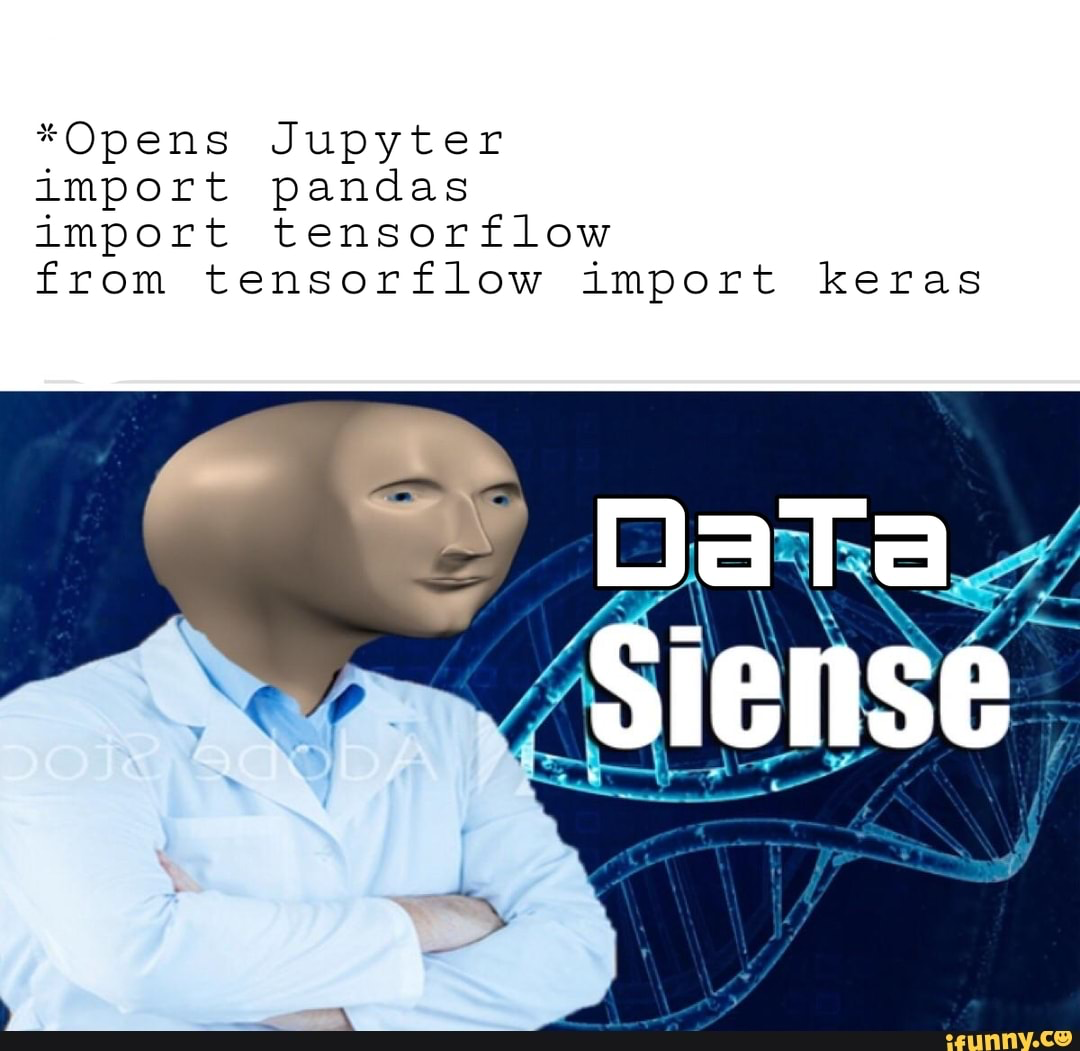

## Visualizations<a class="anchor" id="visual"></a>

To further better understand Amazon's Best Seller Books, let's plot the different types that they offer and which are the most popular ones with a pie chart! For this, we need to check all the type of books that our data collected from the column `Type` of our DataFrame but if we just use this, it will return all the types of the 50 books so we only want the unique values of types.

After this, we use the `len()` function to find the count of how many rows in the dataframe or how many books are a certain book type. 

Using `matplotlib`, we can plot this on a pie chart:

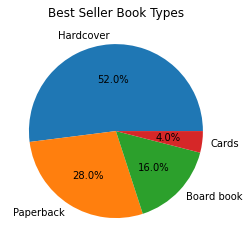

In [8]:
type_names, type_counts = [], []
for each in df['Type'].unique():
    type_names.append(each) # Get the unique names of book types
    type_counts.append(len(df[df['Type'] == each])) # Count how many books/rows are of this type

# Pie chart setting 
plt.title("Best Seller Book Types") # Title of graph
plt.pie(
    type_counts, 
    labels=type_names,
    autopct='%1.1f%%' # Display amounts in percentages
    )
plt.show() # Display graph

As we can see, 48% of the books are Hardcover types followed by 30% are paperback. Board books are those children books who have very hard paper while Spiral-bound books are planners. And, I am honestly not sure how Cards made it to the Best Seller Books, Amazon. We can probably remove them from our DataFrame but I will keep it just for fun!

Now, we can see the price ranges of the books. I will divide the price ranges to be less than \\$5, between \\$5 and \\$10, between \\$10 and \\$20, and more than $20. Let's isolate the rows corresponding to these conditions and save them to a variable for later use.

In [9]:
# Select rows with the specified condition
price_5 = len(df[df['Price (in dollars)'] < 5])
price_5_10 = len(df[(df['Price (in dollars)'] >= 5) & (df['Price (in dollars)'] < 10)])
price_10_20 = len(df[(df['Price (in dollars)'] >= 10) & (df['Price (in dollars)'] < 20)])
price_20 = len(df[df['Price (in dollars)'] >= 20])

With the power of `matplotlib` (and `numpy`), we can plot the data with a bar graph:

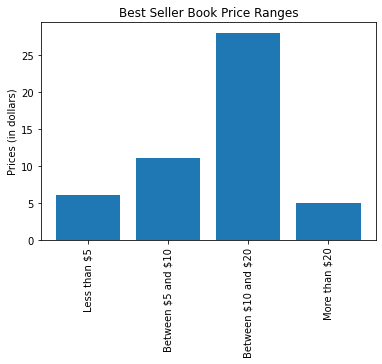

In [10]:
# Data to be plotted
price_ranges = ('Less than $5', 'Between \$5 and \$10', 'Between \$10 and \$20', 'More than $20')
price_ranges_numbers = (price_5, price_5_10, price_10_20, price_20)

# Bar Graph settings
x_coords = np.arange(len(price_ranges))
plt.bar(price_ranges, price_ranges_numbers) 
plt.xticks(rotation=90) # Rotate X-axis labels to be vertically
plt.ylabel('Prices (in dollars)') # Label y-axis
plt.title('Best Seller Book Price Ranges') # Title of graph
plt.show() # Display the graph

As we can see, many books (about half of the first 50) cost ranging between \\$10 and \\$20 followed by between \\$5 and \\$10. If someone wants to save money on books, they can get it for less than $5!

## Conclusion<a class="anchor" id="conclusion"></a>

It was very fun to revisit and code things I did before! I learned both webscraping and exploratory data analysis with Pandas separately and during different times and joining them together felt just right. I understand that there are many things I am missing or overlooking (such as a Cards in Best Seller Books) but I think this was a great start towards my AI/ML/Data Science interests!

![AI Meme](https://i.redd.it/bwk6nb53q0y31.jpg)

## References<a class="anchor" id="references"></a>

https://medium.com/backticks-tildes/how-to-scrape-data-from-a-website-ceda61204f67